In [20]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.metrics import silhouette_score # Método Silhouette
from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer # Método Elbow para conseguir o valor ideal de clusters

import os

### Definindo o nosso dataset

In [29]:
data_set = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)
data_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
data_set.describe(include = "all")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Normalizando e transformando os dados

In [31]:
# Retira o label
data_set = data_set.drop(columns=[0])

# Normalizando com o StandardScaler
scaler = StandardScaler()
normalized_dataset = scaler.fit_transform(data_set)

# Utilizando o PCA para reduzir a dimensionalidade 
pca = PCA(n_components=6)
dataset_pca = pca.fit_transform(normalized_dataset)
transformed_dataset = pd.DataFrame(dataset_pca)

### Método Elbow e Silhouette aplicado ao dataset

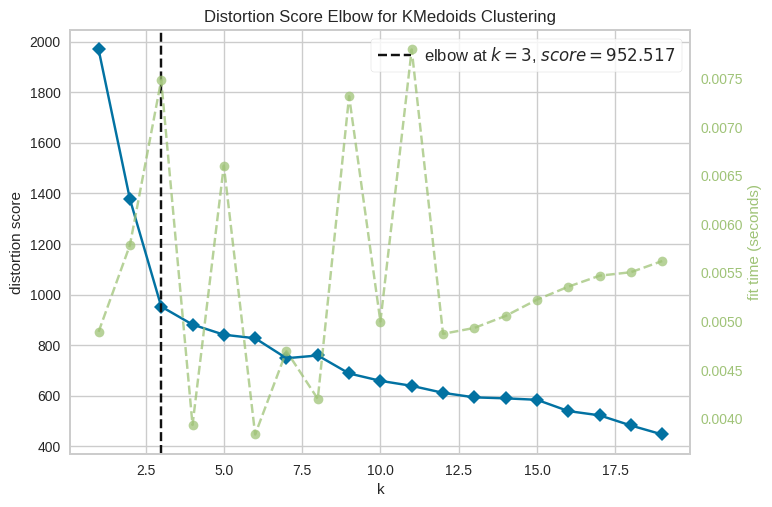

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
model = KMedoids()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(transformed_dataset)
visualizer.poof()

Temos um número ideal de clusters: 3. De toda forma, iremos utilizar o método Silhouette para valores próximos para checar se bate com o resultado do Elbow.


In [33]:
other_k = [2, 3, 4, 5, 6]

for i in other_k:
  kmedoids = KMedoids(n_clusters=i).fit(transformed_dataset)
  labels = kmedoids.labels_
  print(f'Silhouette Score for K = {i}: {metrics.silhouette_score(transformed_dataset , labels)}')

Silhouette Score for K = 2: 0.2917659527658635
Silhouette Score for K = 3: 0.33213567979821884
Silhouette Score for K = 4: 0.26574344847872056
Silhouette Score for K = 5: 0.22570003856360324
Silhouette Score for K = 6: 0.1684772011937444


O valor da silhouette para k = 3 é, de fato, o maior. Logo, iremos utilizar ele

### Resultados da clusterização do KMeans:

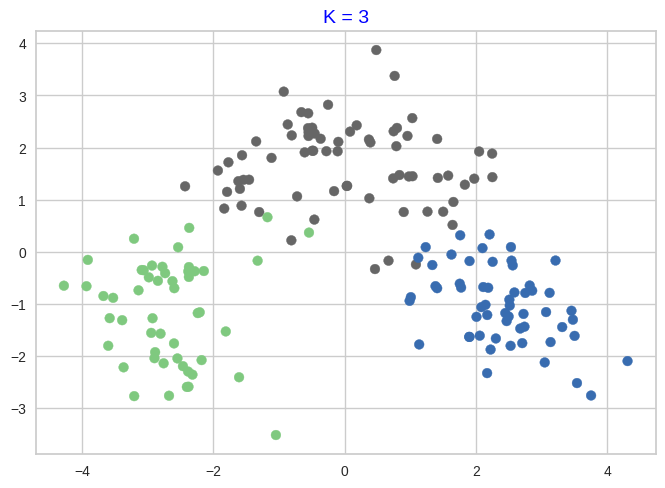

In [34]:
import matplotlib.colors
kmedoids = KMedoids(n_clusters=3).fit(transformed_dataset)
centers = kmedoids.cluster_centers_

fig, ax  = plt.subplots()
ax.scatter(transformed_dataset[0], transformed_dataset[1], c=kmedoids.labels_, cmap='Accent')
ax.set_title("K = 3", fontsize=14, color="blue")
plt.show()


Também podemos utilizar outros valores de K como parâmetro, para comparar como ficaria a clusterização

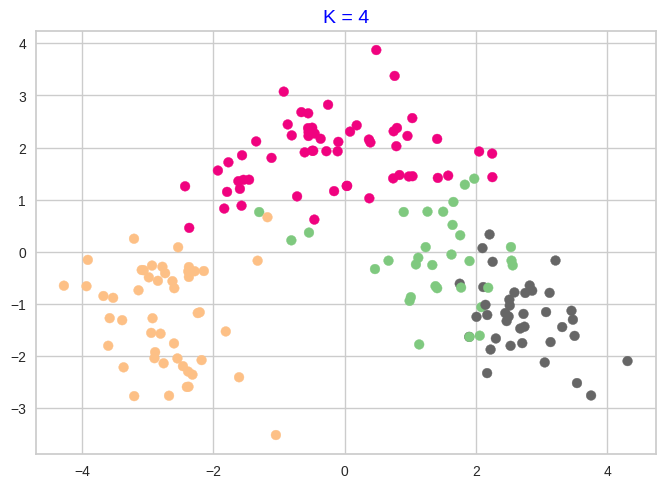

In [35]:
kmedoids = KMedoids(n_clusters=4).fit(transformed_dataset)
centers = kmedoids.cluster_centers_

fig, ax  = plt.subplots()
ax.scatter(transformed_dataset[0], transformed_dataset[1], c=kmedoids.labels_, cmap='Accent')
ax.set_title("K = 4", fontsize=14, color="blue")
plt.show()

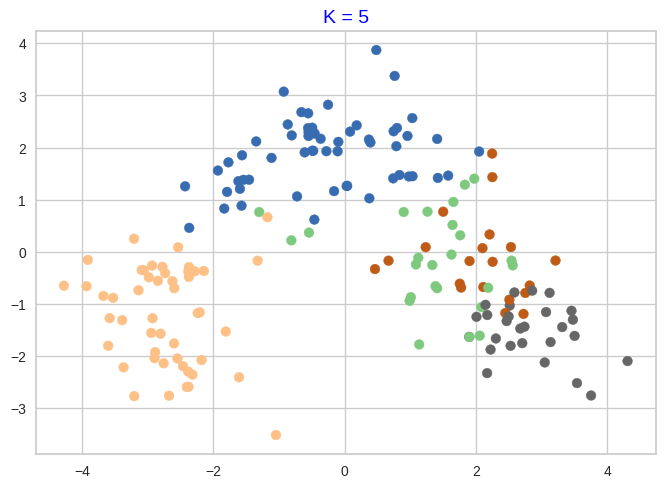

In [36]:
kmedoids = KMedoids(n_clusters=5).fit(transformed_dataset)
centers = kmedoids.cluster_centers_

fig, ax  = plt.subplots()
ax.scatter(transformed_dataset[0], transformed_dataset[1], c=kmedoids.labels_, cmap='Accent')
ax.set_title("K = 5", fontsize=14, color="blue")
plt.show()

Também podemos plotar o gráfico sem a transformação do dataset utilizado:

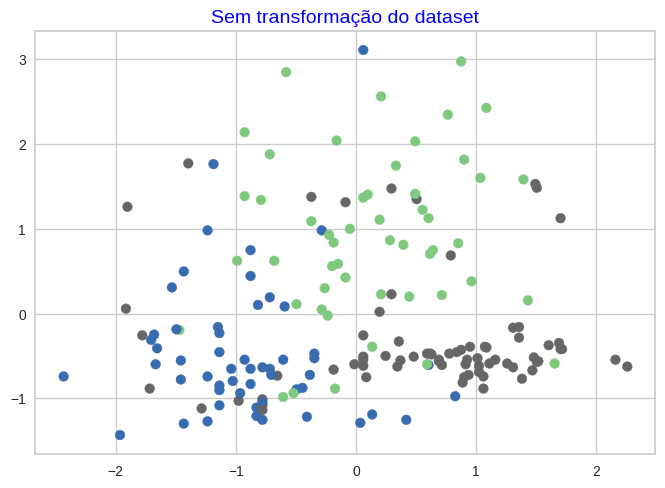

In [37]:
kmedoids = KMedoids(n_clusters=3).fit(normalized_dataset)
centers = kmedoids.cluster_centers_

fig, ax  = plt.subplots()
ax.scatter(normalized_dataset[:, 0], normalized_dataset[:, 1], c=kmedoids.labels_, cmap='Accent')
ax.set_title("Sem transformação do dataset", fontsize=14, color="blue")
plt.show()

Iremos reduzir ainda mais a dimensão do dataset

In [38]:
# Utilizando o PCA para reduzir ainda mais a dimensionalidade
pca_2 = PCA(n_components=2)
dataset_pca_2 = pca_2.fit_transform(normalized_dataset)
transformed_dataset_2 = pd.DataFrame(dataset_pca_2)

other_k = [2, 3, 4, 5, 6]

for i in other_k:
  kmedoids = KMedoids(n_clusters=i).fit(transformed_dataset_2)
  labels = kmedoids.labels_
  print(f'Silhouette Score for K = {i}: {metrics.silhouette_score(transformed_dataset_2 , labels)}')

Silhouette Score for K = 2: 0.46387089858068525
Silhouette Score for K = 3: 0.5609305721582906
Silhouette Score for K = 4: 0.48477735611333117
Silhouette Score for K = 5: 0.42314021820360087
Silhouette Score for K = 6: 0.42166933673841206


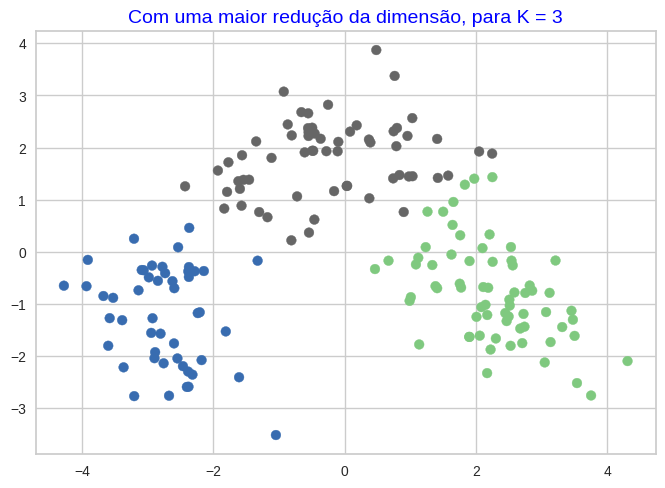

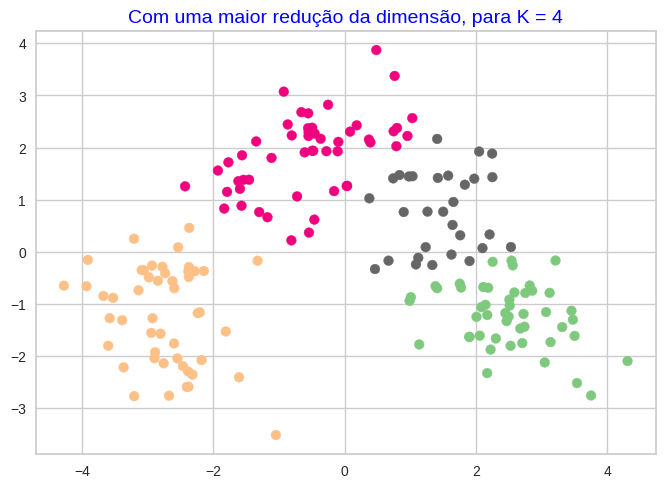

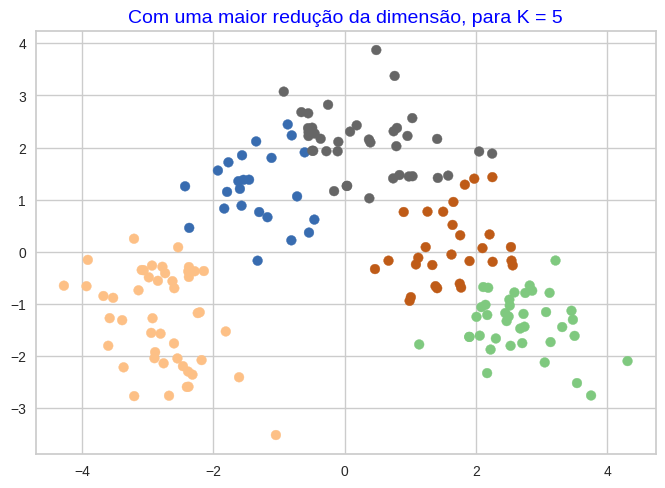

In [39]:
kmedoids = KMedoids(n_clusters=3).fit(transformed_dataset_2)
centers = kmedoids.cluster_centers_

fig, ax  = plt.subplots()
ax.scatter(transformed_dataset_2.iloc[:, 0], transformed_dataset_2.iloc[:, 1], c=kmedoids.labels_, cmap='Accent')
ax.set_title("Com uma maior redução da dimensão, para K = 3", fontsize=14, color="blue")
plt.show()

kmedoids = KMedoids(n_clusters=4).fit(transformed_dataset_2)
centers = kmedoids.cluster_centers_
fig, ax  = plt.subplots()
ax.scatter(transformed_dataset_2.iloc[:, 0], transformed_dataset_2.iloc[:, 1], c=kmedoids.labels_, cmap='Accent')
ax.set_title("Com uma maior redução da dimensão, para K = 4", fontsize=14, color="blue")
plt.show()

kmedoids = KMedoids(n_clusters=5).fit(transformed_dataset_2)
centers = kmedoids.cluster_centers_
fig, ax  = plt.subplots()
ax.scatter(transformed_dataset_2.iloc[:, 0], transformed_dataset_2.iloc[:, 1], c=kmedoids.labels_, cmap='Accent')
ax.set_title("Com uma maior redução da dimensão, para K = 5", fontsize=14, color="blue")
plt.show()

Novamente, a clusterização ficou melhor definida. Isso pode ser observado pelo fato de menos pontos de cores diferentes estarem presentes em um mesmo cluster